In [36]:
from customerManager import CustomerManager
customer_path = "./config/customer_classes.json"
cManager = CustomerManager(file_path = customer_path)

In [70]:
import numpy as np

class Learner():
    def __init__(self):
        self.n_arms = 10
        self.bid = np.linspace(1.0, 10.0, self.n_arms)
        
        self.t = 0 
        
        
        self.rewards_per_arm = x = [[] for i in range(self.n_arms)]
        self.collected_rewards = []
    
    def update_observations(self, pulled_arm, reward):
        self.rewards_per_arm[pulled_arm].append(reward)
        self.collected_rewards.append(reward*10000)

class TS_Learner(Learner):
    def __init__(self):
        super().__init__()
        #Mean and Std
        self.normal_parameters = np.zeros((self.n_arms, 2))

    def pull_arm(self):
        if self.t < self.n_arms: return self.t

        # safety constraint
        arg_max = []
        for p in self.normal_parameters:
            samples = np.random.normal(p[0], p[1],total_len)
            only_neg = [num for num in samples if num < 0]
            neg_count = len(only_neg)
            if (neg_count/total_len)<0.2:
                arg_max.append(np.random.normal(p[0], p[1]))
            else:
                arg_max.append(0.0)

        return np.argmax(arg_max)

    def update(self, pulled_arm, reward):
        self.t += 1
        times_pulled = max(1, len(self.rewards_per_arm[pulled_arm]))
        self.update_observations(pulled_arm, reward)
        #Empirical mean
        self.normal_parameters[pulled_arm, 0] = (self.normal_parameters[pulled_arm, 0] * (times_pulled - 1) + reward ) / times_pulled
        #Empirical std
        self.normal_parameters[pulled_arm, 1] = np.sqrt(sum((self.normal_parameters[pulled_arm, 0] - self.rewards_per_arm[pulled_arm])**2)/times_pulled)


In [38]:
opt_bids = [3.9416202240277745 , 3.0,  4.0]
opt_price = 7

In [71]:
from environment import Environment
from tqdm import tqdm

price = 5.0

T = 365
env = Environment()
regret = []
ts_learner = TS_Learner()
ts_rewards_per_experiment = np.ndarray([])

regret=[]

for t in tqdm(range(T)):
    #TS learner 
    bid = ts_learner.pull_arm()
    bids = [bid,bid,bid]
    reward = env.round(bids,price)
    ts_learner.update(bid, sum(reward)/10000)

    regret.append(sum(env.round(opt_bids, opt_price, noise = False)) - sum(reward))



  7%|▋         | 26/365 [00:00<00:01, 245.30it/s][0. 0.]
[0.15183289 0.        ]
[0.20526444 0.        ]
[0.21081136 0.        ]
[0.19478713 0.        ]
[0.16710307 0.        ]
[0.1342122 0.       ]
[0.08803346 0.        ]
[0.05542348 0.        ]
[0.01589664 0.        ]
[[0.         0.        ]
 [0.15183289 0.        ]
 [0.20526444 0.        ]
 [0.21081136 0.        ]
 [0.19478713 0.        ]
 [0.16710307 0.        ]
 [0.1342122  0.        ]
 [0.08803346 0.        ]
 [0.05542348 0.        ]
 [0.01589664 0.        ]]
[0. 0.]
[0.15183289 0.        ]
[0.20526444 0.        ]
[0.2111887  0.00037734]
[0.19478713 0.        ]
[0.16710307 0.        ]
[0.1342122 0.       ]
[0.08803346 0.        ]
[0.05542348 0.        ]
[0.01589664 0.        ]
[[0.         0.        ]
 [0.15183289 0.        ]
 [0.20526444 0.        ]
 [0.2111887  0.00037734]
 [0.19478713 0.        ]
 [0.16710307 0.        ]
 [0.1342122  0.        ]
 [0.08803346 0.        ]
 [0.05542348 0.        ]
 [0.01589664 0.        ]]
[0. 0

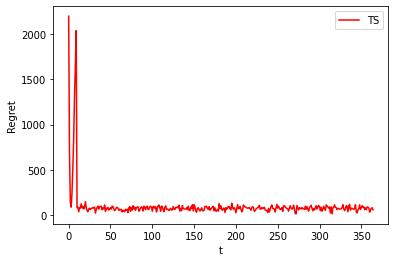

In [72]:
import matplotlib.pyplot as plt 

plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(regret , 'r')
plt.legend(["TS" ])
plt.show()

In [73]:
regret[-10:]

[81.70702904844211,
 60.79058417221313,
 90.68559595790475,
 88.19897593486849,
 80.75320817552438,
 33.714218489726136,
 64.82962360680676,
 71.30260046829017,
 83.32990988810116,
 59.50642099590823]

In [69]:
import numpy as np

param = np.array([[0.09412074, 0.0],[0.21232988, 0.00206967]])
total_len= 1000
arg_max = []
for p in param:
    print(p)
    samples = np.random.normal(p[0], p[1],total_len)
    only_neg = [num for num in samples if num < 0]
    neg_count = len(only_neg)
    prob = neg_count/total_len
    print(neg_count)
    if prob<0.2:
        arg_max.append(np.random.normal(p[0], p[1]))
    else:
        arg_max.append(0.0)
print(arg_max)

[0.09412074 0.        ]
0
[0.21232988 0.00206967]
0
[0.0, 0.0]


In [42]:
s = np.random.normal(param[:,0], param[:,1])
s

array([-1.7915172 ,  2.03421324])

In [49]:

np.random.normal(0, 0,1000)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.